Loan Data Preprocessing 


In [46]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler


Step 1 - Load the dataset


In [47]:
#Import the CSV file and create a DataFrame 'loan_data' to view and perform operations

loan_data = pd.read_csv("C:/Users/msset/OneDrive/Tài liệu/For_Python CSV Files/train_loan.csv")
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
# To view the columns in DataFrame

loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
#To view the data types of the columns in DataFrame

loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [50]:
#To view the statistical values of the distribution in the DataFrame 

loan_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Step 2 (a) -Imputation:
The process of replacing missing data with substituted values (Missing value handling
)

In [51]:
#To view the total number of null/missing values in each columns in the DataFrame

loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
#Find the percentage of missing values in each columns of the DataFrame

loan_data.isna().sum()/len(loan_data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [53]:
#Find Distribution, mean and median values of each columns.
#Get the distribution values using matplotlib

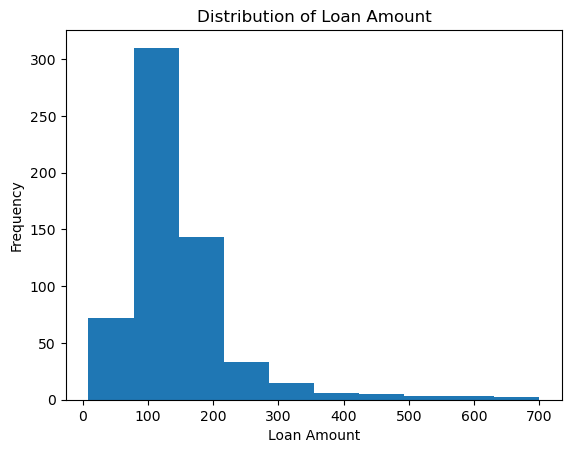

In [54]:
#Distribution of Loan Amount

plt.hist(loan_data['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [55]:
#Mean of Loan Amount using .mean()

mean_LoanAmount = loan_data['LoanAmount'].mean()
mean_LoanAmount

146.41216216216216

In [56]:
#Median of Loan Amount using .median()

median_LoanAmount = loan_data['LoanAmount'].median()
median_LoanAmount

128.0

In [57]:
#Filling meadian value since the histogram shows positive skew towards right.

loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(median_LoanAmount)

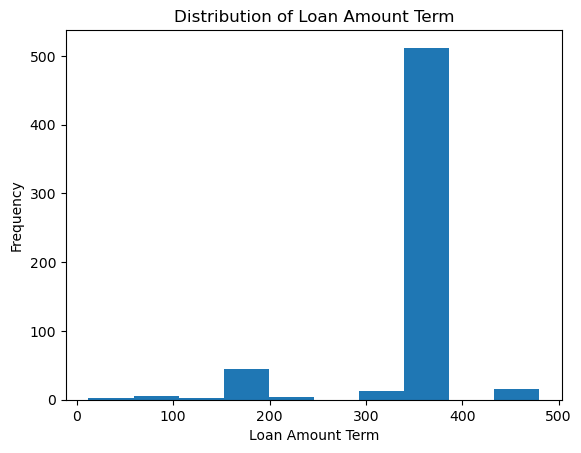

In [58]:
#Distribution of Loan_Amount_Term

plt.hist(loan_data['Loan_Amount_Term'])
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

In [59]:
#Mean of Loan_Amount_Term using .mean()

mean_Loan_Amount_Term = loan_data['Loan_Amount_Term'].mean()
mean_Loan_Amount_Term

342.0

In [60]:
#Median of Loan_Amount_Term using .median()

median_Loan_Amount_Term = loan_data['Loan_Amount_Term'].median()
median_Loan_Amount_Term

360.0

In [61]:
#Filling meadian value since the histogram shows negative skew towards left.

loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(median_Loan_Amount_Term)

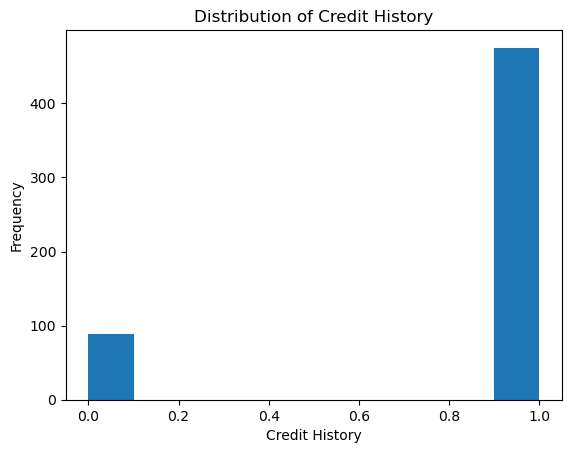

In [62]:
#Distribution of Credit_History

plt.hist(loan_data['Credit_History'])
plt.title('Distribution of Credit History')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.show()

In [63]:
#Mean of Credit_History using .mean()

mean_Credit_History = loan_data['Credit_History'].mean()
mean_Credit_History

0.8421985815602837

In [64]:
#Median of Credit_History using .median()

median_Credit_History = loan_data['Credit_History'].median()
median_Credit_History

1.0

In [103]:
#Filling meadian value since the histogram shows negative skew towards left.

loan_data['Credit_History'] = loan_data['Credit_History'].fillna(median_Credit_History)

In [66]:
#Find mode values of each columns

In [67]:
loan_data['Gender'].mode(0)

0    Male
Name: Gender, dtype: object

In [68]:
loan_data['Married'].mode(0)

0    Yes
Name: Married, dtype: object

In [69]:
loan_data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [70]:
loan_data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [71]:
#Fill the missing data using respective mode values

loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [72]:
loan_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Step 2 (b) - Outlier Detection

In [73]:
#Outlier detection using BoxPlots

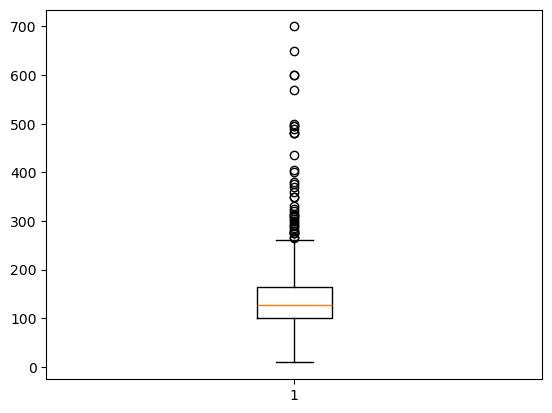

In [74]:
#LoanAmount Outliers

plt.boxplot(loan_data['LoanAmount'])
plt.show()

In [105]:
#LoanAmount Outliers (Upper Whisker and Lower Whisker identification)

q1_LoanAmount = loan_data['LoanAmount'].quantile(0.25)
q2_LoanAmount = loan_data['LoanAmount'].quantile(0.50)
q3_LoanAmount = loan_data['LoanAmount'].quantile(0.750)
iqr_LoanAmount = q3_LoanAmount-q1_LoanAmount
u_value_LoanAmount = q3_LoanAmount+(1.5*iqr_LoanAmount)
l_value_LoanAmount = q1_LoanAmount-(1.5*iqr_LoanAmount)
print(u_value_LoanAmount, l_value_LoanAmount)

261.5 3.5


In [107]:
#Identfying the index values of the identfiers

loan_data[(loan_data['LoanAmount']<l_value_LoanAmount )|(loan_data['LoanAmount']>u_value_LoanAmount)].index

Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171, 177,
       233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372, 381, 391,
       409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592, 600, 604],
      dtype='int64')

In [109]:
# Remove the outliers

loan_data = loan_data.drop([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171, 177,
       233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372, 381, 391,
       409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592, 600, 604])


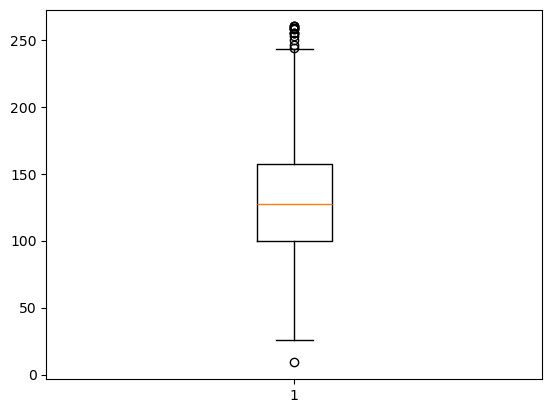

In [113]:
plt.boxplot(loan_data['LoanAmount'])
plt.show()

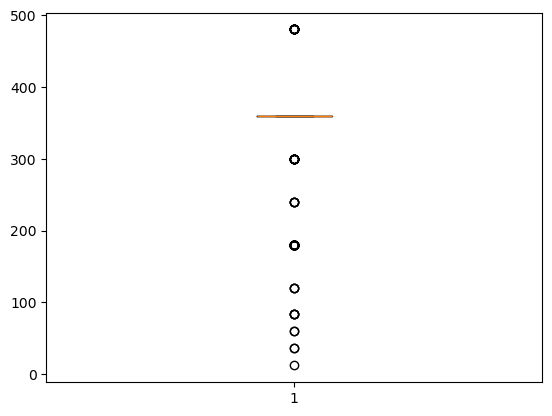

In [75]:
#Loan_Amount_Term Outliers

plt.boxplot(loan_data['Loan_Amount_Term'])
plt.show()

In [110]:
#Loan_Amount_Term Outliers (Upper Whisker and Lower Whisker identification)

q1_Loan_Amount_Term = loan_data['Loan_Amount_Term'].quantile(0.25)
q2_Loan_Amount_Term = loan_data['Loan_Amount_Term'].quantile(0.50)
q3_Loan_Amount_Term = loan_data['Loan_Amount_Term'].quantile(0.750)
iqr_Loan_Amount_Term = q3_Loan_Amount_Term-q1_Loan_Amount_Term
u_value_Loan_Amount_Term = q3_Loan_Amount_Term+(1.5*iqr_Loan_Amount_Term)
l_value_Loan_Amount_Term = q1_Loan_Amount_Term-(1.5*iqr_Loan_Amount_Term)
print(u_value_Loan_Amount_Term, l_value_Loan_Amount_Term)

360.0 360.0


In [111]:
#Identfying the index values of the identfiers

loan_data[(loan_data['Loan_Amount_Term']<l_value_Loan_Amount_Term )|(loan_data['Loan_Amount_Term']>u_value_Loan_Amount_Term)].index

Index([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100, 109,
       115, 128, 133, 142, 144, 164, 168, 172, 179, 182, 186, 189, 202, 228,
       231, 241, 242, 245, 247, 248, 262, 282, 286, 293, 298, 313, 315, 334,
       355, 358, 363, 366, 373, 375, 378, 385, 393, 400, 401, 408, 429, 435,
       444, 451, 453, 461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539,
       540, 546, 554, 573, 575, 585, 590, 591, 593, 605, 610],
      dtype='int64')

In [112]:
# Remove the outliers

loan_data = loan_data.drop([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100, 109,
       115, 128, 133, 142, 144, 164, 168, 172, 179, 182, 186, 189, 202, 228,
       231, 241, 242, 245, 247, 248, 262, 282, 286, 293, 298, 313, 315, 334,
       355, 358, 363, 366, 373, 375, 378, 385, 393, 400, 401, 408, 429, 435,
       444, 451, 453, 461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539,
       540, 546, 554, 573, 575, 585, 590, 591, 593, 605, 610])

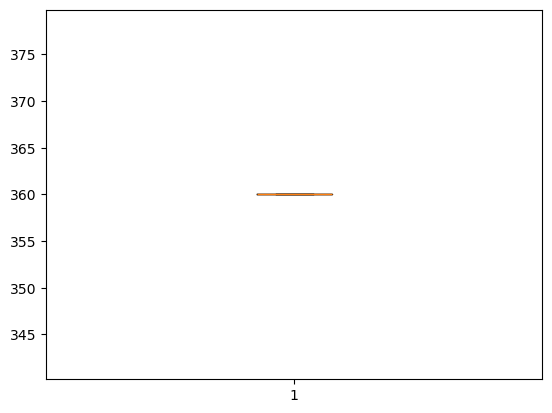

In [114]:
plt.boxplot(loan_data['Loan_Amount_Term'])
plt.show()

Step 2 (c) - Encoding

In [77]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
#Make a list of categorical data columns

cat_col = [ 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']
loan_data[cat_col]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [79]:
loan_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
loan_data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [81]:
loan_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [82]:
loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [83]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [84]:
loan_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [89]:
#Remove the '+' symbol from the data and convert the values to integer type.

loan_data['Dependents'] = loan_data['Dependents'].str.replace('+','')

loan_data['Dependents'] = loan_data['Dependents'].astype('int')


In [90]:
loan_data.head()
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [121]:
#Seperate target and feature columns 
x = loan_data.drop('Loan_Status', axis = 1)
x = loan_data.drop('Loan_ID', axis = 1)
y = loan_data['Loan_Status']

In [92]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [115]:
#Mapping Encoded data for the column 'Property_Area'

dict1 = {'Urban' : 1, 'Rural' : 2, 'Semiurban': 3}
loan_data['Property_Area'] = loan_data['Property_Area'].map(dict1)
loan_data[cat_col]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Y
1,LP001003,Male,Yes,1,Graduate,No,2,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Y
4,LP001008,Male,No,0,Graduate,No,1,Y
...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,2,Y
609,LP002978,Female,No,0,Graduate,No,2,Y
611,LP002983,Male,Yes,1,Graduate,No,1,Y
612,LP002984,Male,Yes,2,Graduate,No,1,Y


In [116]:
#One Hot Encoding steps introduced for the columns and identifying the values for Label Encoding

le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [122]:
x = pd.get_dummies(x, dtype= int)
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,2,0,1,0,1,1,0,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,1
